# Data analysis books for UBike services
We require to install **pandas**, **metplotlib** and **seaborn** in the virtual environment. 


In [58]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display

#pd.set_option('display.max_rows',30)
#pd.set_option('large_repr', 'info')

# read data here
bikecsv = pd.read_csv('data/youbike_240518.csv') 

bikecsv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407030 entries, 0 to 407029
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   _id              407030 non-null  object
 1   station_no       407030 non-null  int64 
 2   station_name     407030 non-null  object
 3   station_name_en  407030 non-null  object
 4   district         407030 non-null  object
 5   district_en      407030 non-null  object
 6   total            407030 non-null  int64 
 7   rentAvailable    407030 non-null  int64 
 8   returnAvaiable   407030 non-null  int64 
 9   updated_time     407030 non-null  object
 10  info_time        407030 non-null  object
dtypes: int64(4), object(7)
memory usage: 34.2+ MB

## Before analyses, it requires us to know columns in csv data

**Here is the table show meaning or types of data.**

| Column Name | Type (Numerical/Category) | nullable | description |
| --- | --- | --- | --- |
| _id | Categorical | non-null | uuid generated by mongoDB also serial id |  
| station_no | Categorical | non-null | Serial Number |  
| station_name | Categorical | non-null | Station name |  
| district | Categorical | non-null | stations in which districts |  
| total | Numerical |  non-null | total = used + empty| 
| rentAvailable | Numerical |  non-null | available rental seats in stations | 
| returnAvaiable | Numerical |  non-null | avaiable return seats in stations | 
| updated_time | Date String | non-null | date time string in TZ GMT+8 |
|info_time | Date String | non-null | date time string in TZ GMT+8 |

Also, `info_time` can be categorize as workday or weekend to analyse 

## After Identify meanings of data columns, Here is a check list to process the dataframe

In [59]:
import ipywidgets as widgets

cb1 = widgets.Checkbox(description="define the outliers according to description of columns")
cb2 = widgets.Checkbox(description="define the error data in csv and remove them")
cb3 = widgets.Checkbox(description="process date string with pandas")
cb4 = widgets.Checkbox(description="Drop Some serial ID columns")

pb = widgets.Button(
    description='Click me',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
)

def on_button_clicked(b):
    print("clicked on:",b)
    print("cb1:", cb1.value)
    print("cb2:", cb2.value)
    print("cb3:", cb3.value)
    print("cb4:", cb4.value)

pb.on_click(on_button_clicked)

ui = widgets.VBox([widgets.VBox([cb1, cb2, cb3, cb4]),pb])

display(ui)

clicked on: Button(description='Click me', style=ButtonStyle(), tooltip='Click me')
cb1: False
cb2: False
cb3: False
cb4: False


In [60]:
print('In the Step: we are going to drop serial columns')
# drop column here axis=0 indicates data in row, axis=1 indicates data in column
bikecsv = bikecsv.drop(axis=1, columns=['_id', 'station_no'])
bikecsv

In the Step: we are going to drop serial columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407030 entries, 0 to 407029
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   station_name     407030 non-null  object
 1   station_name_en  407030 non-null  object
 2   district         407030 non-null  object
 3   district_en      407030 non-null  object
 4   total            407030 non-null  int64 
 5   rentAvailable    407030 non-null  int64 
 6   returnAvaiable   407030 non-null  int64 
 7   updated_time     407030 non-null  object
 8   info_time        407030 non-null  object
dtypes: int64(3), object(6)
memory usage: 27.9+ MB

In [68]:
print('In the Step: we are going to drop error data')

filtered = bikecsv.loc[bikecsv['total'] != bikecsv['rentAvailable']+bikecsv['returnAvaiable'],:]

print('Error data Percentage: '+str(round(len(filtered)/len(bikecsv),4) * 100)+'%')

bikecsv = bikecsv.loc[bikecsv['total'] == bikecsv['rentAvailable']+bikecsv['returnAvaiable'],:]


In the Step: we are going to drop error data
Error data Percentage: 12.22%


In [74]:
print('Let\'s show some insight of date')

## convert datetime strings to datetime formats
bikecsv['info_time'] = pd.to_datetime(bikecsv['info_time'],format='%Y-%m-%d %H:%M:%S')
bikecsv['updated_time'] = pd.to_datetime(bikecsv['updated_time'],format='%Y-%m-%d %H:%M:%S')
bikecsv.loc[:,['info_time','updated_time']]

Let's show some insight of date


/var/folders/gw/xs4027fs03d38xr930y9wywm0000gn/T/ipykernel_33098/2961098777.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikecsv['info_time'] = pd.to_datetime(bikecsv['info_time'],format='%Y-%m-%d %H:%M:%S')
/var/folders/gw/xs4027fs03d38xr930y9wywm0000gn/T/ipykernel_33098/2961098777.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikecsv['updated_time'] = pd.to_datetime(bikecsv['updated_time'],format='%Y-%m-%d %H:%M:%S')


<class 'pandas.core.frame.DataFrame'>
Index: 357291 entries, 0 to 407029
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   info_time     357291 non-null  datetime64[ns]
 1   updated_time  357291 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.2 MB

In [89]:
## calculate time difference between station updated time and current time
timeDiff = (bikecsv['info_time'] - bikecsv['updated_time']) / pd.Timedelta(minutes=1)

bikecsv['TimeDiff'] = timeDiff

bikecsv

/var/folders/gw/xs4027fs03d38xr930y9wywm0000gn/T/ipykernel_33098/1692005666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikecsv['TimeDiff'] = timeDiff


<class 'pandas.core.frame.DataFrame'>
Index: 357291 entries, 0 to 407029
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   station_name     357291 non-null  object        
 1   station_name_en  357291 non-null  object        
 2   district         357291 non-null  object        
 3   district_en      357291 non-null  object        
 4   total            357291 non-null  int64         
 5   rentAvailable    357291 non-null  int64         
 6   returnAvaiable   357291 non-null  int64         
 7   updated_time     357291 non-null  datetime64[ns]
 8   info_time        357291 non-null  datetime64[ns]
 9   TimeDiff         357291 non-null  float64       
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 30.0+ MB

In [91]:
## judge if current time is workday or not
def isWorkHour (timeSeries):
    work_day = timeSeries.weekday() < 5
    work_hour = timeSeries.hour >= 8 & timeSeries.hour < 19
    return work_day & work_hour

workday = bikecsv['info_time'].apply(isWorkHour)

bikecsv['isWorkDay'] = workday

bikecsv

/var/folders/gw/xs4027fs03d38xr930y9wywm0000gn/T/ipykernel_33098/3703296375.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikecsv['isWorkDay'] = workday


<class 'pandas.core.frame.DataFrame'>
Index: 357291 entries, 0 to 407029
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   station_name     357291 non-null  object        
 1   station_name_en  357291 non-null  object        
 2   district         357291 non-null  object        
 3   district_en      357291 non-null  object        
 4   total            357291 non-null  int64         
 5   rentAvailable    357291 non-null  int64         
 6   returnAvaiable   357291 non-null  int64         
 7   updated_time     357291 non-null  datetime64[ns]
 8   info_time        357291 non-null  datetime64[ns]
 9   TimeDiff         357291 non-null  float64       
 10  isWorkDay        357291 non-null  bool          
dtypes: bool(1), datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 30.3+ MB

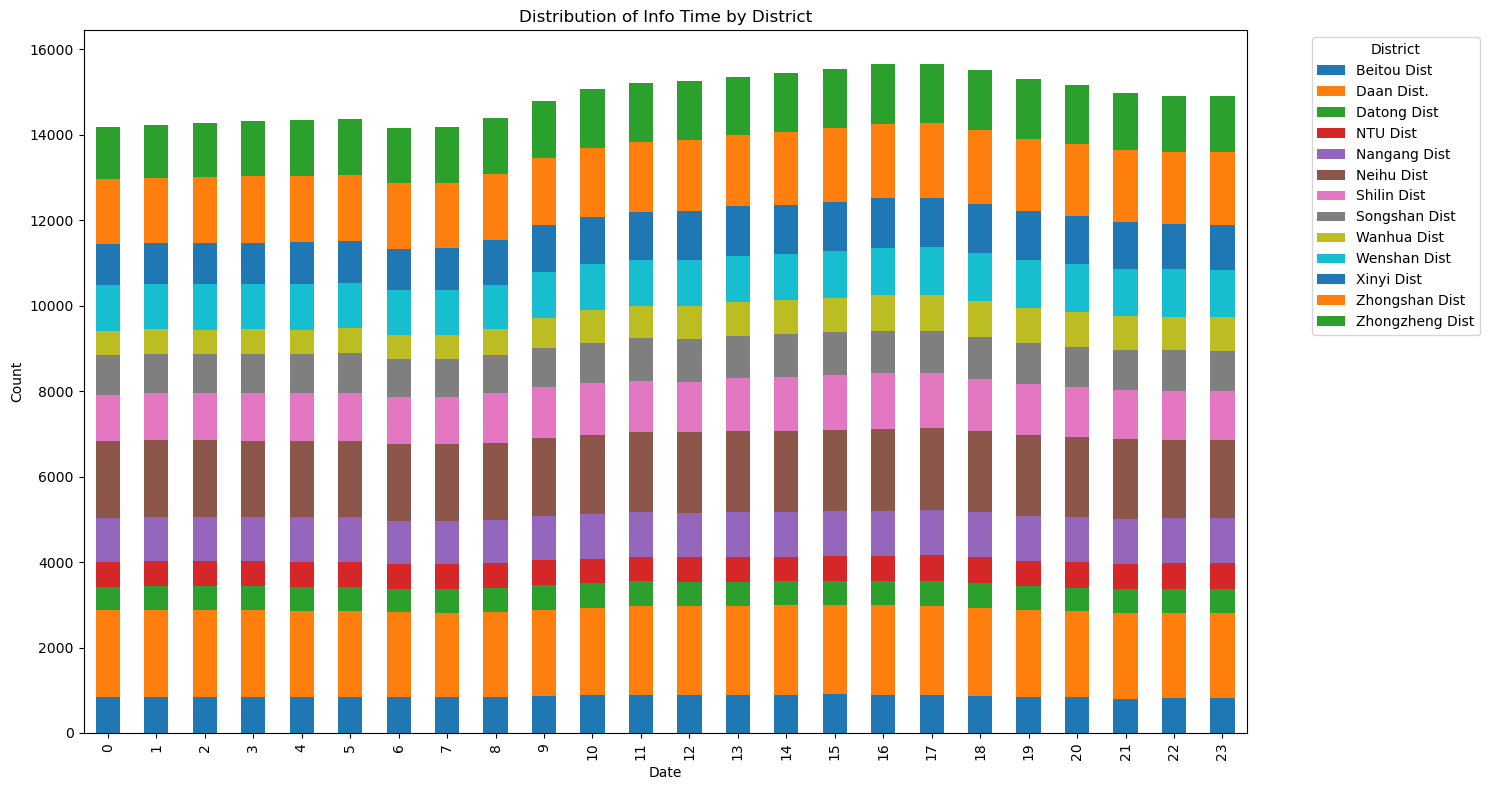

In [93]:

# 按照 'district_en' 和 'info_time' 聚合
grouped = bikecsv.groupby([bikecsv['info_time'].dt.hour, 'district_en']).size().unstack(fill_value=0)

# 创建直方图
grouped.plot(kind='bar', stacked=True, figsize=(15, 8))

plt.title('Distribution of Info Time by District')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()